## Задание 1

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def generator(n):
    arr = []
    for i in range (0,n):
        A = np.random.rand(5,5)
        for j in range (0, 5):
            A[j] = A[j,:]/sum(A[j,:])
        arr.append(A)
    
    return arr

In [3]:
samples = generator(20)

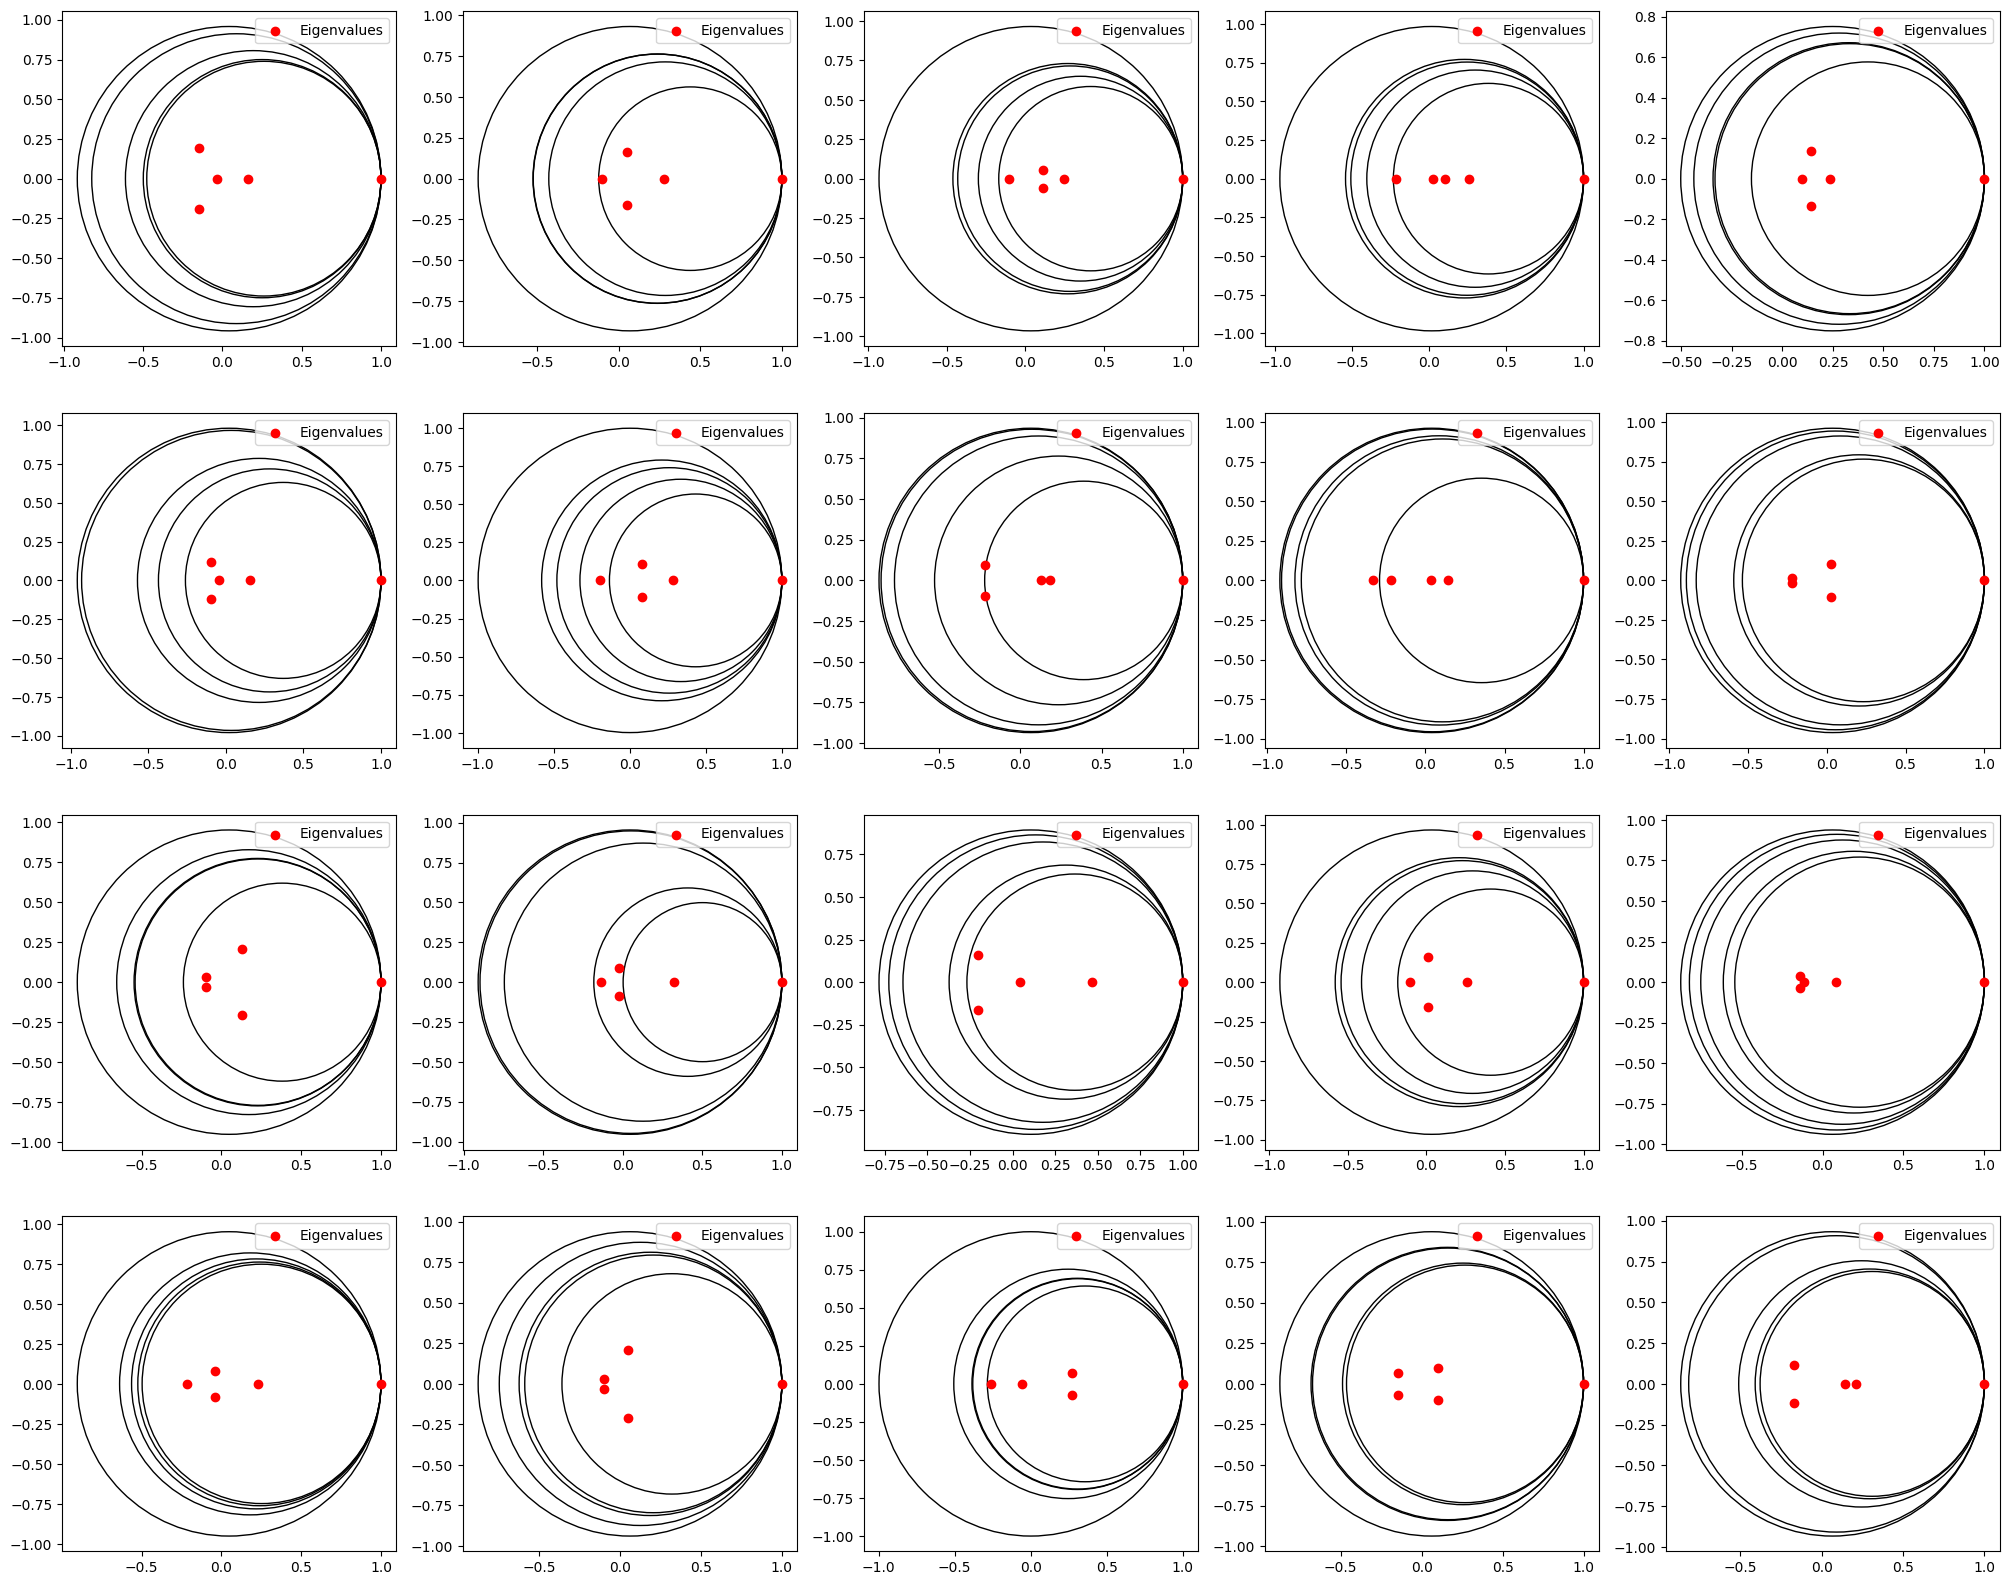

In [4]:
fig, ax = plt.subplots(4, 5)
fig.set_size_inches(25, 20)
for n, elem in enumerate(samples):
    k = n//5
    m = n%5
    xg = np.diag(elem).real
    yg = np.diag(elem).imag
    rg = np.zeros(np.shape(elem)[0])
    ev = np.linalg.eigvals(elem)
    for i in range(0,5):
        rg[i] = np.sum(np.abs(elem[i, :])) - np.abs(elem[i, i])
        crc = plt.Circle((xg[i], yg[i]), radius=rg[i], fill=False)
        ax[k, m].add_patch(crc)
    ax[k, m].scatter(ev.real, ev.imag, color='r', label="Eigenvalues")
    ax[k, m].legend()
    
    

## Задание 2

In [88]:
import pandas as pd

In [174]:
import scipy as sp

In [111]:
import csv

In [140]:
txt_file = r"C:/Users/Матвей/Downloads/web-Stanford.txt"
csv_file = r"mycsv.csv"
in_txt = csv.reader(open(txt_file, "r"), delimiter = '\t')
out_csv = csv.writer(open(csv_file, 'w'))

out_csv.writerows(in_txt)

In [145]:
data = pd.read_csv(csv_file).to_numpy()
np.shape(data)

(2312497, 2)

In [254]:
array = sp.sparse.lil_matrix((281903,281903), dtype=np.float64)
for i in range (0, np.shape(data)[0]):
    array[data[i][0]-1,data[i-1][1]-1] = 1

In [ ]:
G = np.zeros((20,20), dtype=np.float16)
for i in range (0,20):
    for j in range (0,20):
        if int(sum(array.getcol(j).toarray())) != 0:
            G[i,j]=array[i,j]/int(sum(array.getcol(j).toarray()))
        else:
            G[i,j]=1/np.shape(G)[0]
## Очень крупные и долгие вычисления...

Берем только первые 20 ссылок, так как я устал ждать и не знаю, как сократить время вычисления

In [269]:
G = 0.8*G+0.01*np.ones((20,20))
## Степенной метод
x = np.zeros((20,1))
x[0,0]=1
x = G@x/np.linalg.norm(G@x, 2)
lamb = x.T@(G@x)
while np.linalg.norm(G@x-lamb*x, 2)>0.00001:
    x = G@x/np.linalg.norm(G@x, 2)
    lamb = x.T@(G@x)
lamb, x

(array([[0.93165102]]),
 array([[0.22252108],
        [0.22252108],
        [0.22283178],
        [0.22252108],
        [0.22252108],
        [0.22252108],
        [0.22252108],
        [0.24303226],
        [0.22252108],
        [0.22252108],
        [0.22252108],
        [0.22252108],
        [0.22252108],
        [0.22252108],
        [0.22252108],
        [0.22252108],
        [0.22252108],
        [0.22252108],
        [0.22252108],
        [0.22252108]]))

Видим, что собственное число близко к единице (0.93), а собственный вектор имеет практичеки неотличающиеся компоненты, то есть по сути страничный рейтинг для них одинаковый. Такой результат получен, очевидно, ввиду отсутствия большинства ссылок (их порядка 280 тысяч) 

## Задание 4

In [270]:
pip install networkx

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 24.3.1
[notice] To update, run: C:\Users\Матвей\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


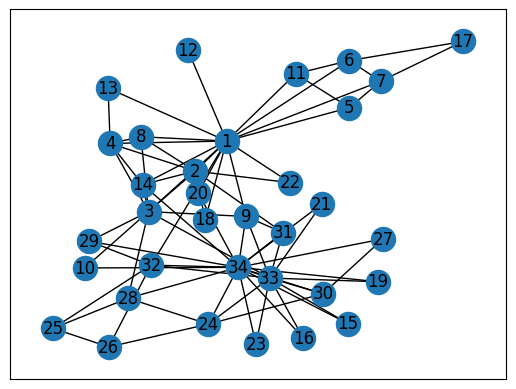

In [280]:
import networkx as nx
kn = nx.read_gml("C:/Users/Матвей/Downloads/graph.gml")
nx.draw_networkx(kn)

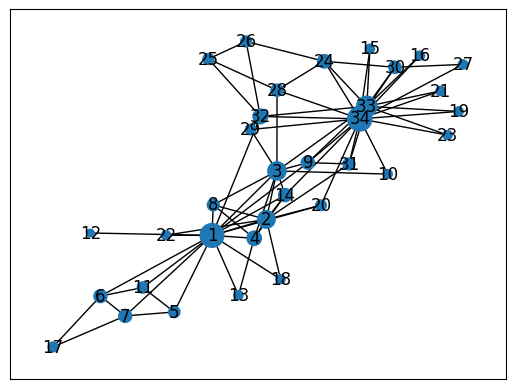

In [281]:
pr = nx.algorithms.link_analysis.pagerank(kn)
pr_vector = list(pr.values())
pr_vector = np.array(pr_vector) * 3000
nx.draw_networkx(kn, node_size=pr_vector, labels=None)